# Flow and Capacity: Understanding Movement Through Networks

This notebook demonstrates **flow** (movement through networks) and **capacity** (limits on flow).

Understanding flow and capacity is essential because:
- **Flow is what makes networks useful** - without flow, networks are just static structures
- **Capacity limits flow** - you cannot flow more than capacity allows
- **Flow patterns reveal bottlenecks** - where flow is concentrated and capacity is insufficient
- **Confusing flow rate with total flow** leads to capacity planning mistakes


## Key Concepts

**Flow** is the movement of something through a network:
- Resources, goods, information, people, money, energy
- Measured in units per time (flow rate) or total units (total flow)
- Flow is what makes networks dynamic and useful

**Capacity** is the maximum flow possible:
- Maximum amount that can flow through a link or node per unit of time
- Flow cannot exceed capacity
- If flow exceeds capacity, you get congestion, delays, or failures

**Flow Rate vs Total Flow**:
- **Flow rate**: How fast something flows (units per time) - e.g., 100 trucks per day
- **Total flow**: How much has flowed over a period (total units) - e.g., 1,000 trucks this week
- Capacity must be compared to flow rate, not total flow

**Critical insight**: Understanding flow and capacity helps you identify bottlenecks, evaluate routing decisions, and make better network management choices.


## Scenario: Package Delivery Network

A delivery company routes packages through a network of distribution centers. Each route has capacity limits, and packages flow through the network.

**The Network**:
- Distribution centers: DC1, DC2, DC3
- Stores: S1, S2, S3, S4
- Routes connect distribution centers to stores

**The Challenge**:
- Packages flow from distribution centers to stores
- Each route has a capacity (maximum packages per day)
- Current flow may exceed capacity on some routes
- Need to identify bottlenecks and balance flow

**The Question**: Where is flow exceeding capacity? How can we balance flow across routes?


## Step 1: Install Required Packages (Colab)


In [1]:
%pip install networkx matplotlib -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('default')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10


## Step 3: Create Network with Flow and Capacity

Let's create a network and add flow and capacity information:


In [3]:
# Create network
G = nx.DiGraph()

# Add nodes
distribution_centers = ['DC1', 'DC2', 'DC3']
stores = ['S1', 'S2', 'S3', 'S4']
G.add_nodes_from(distribution_centers)
G.add_nodes_from(stores)

# Add edges with capacity and flow information
# Format: (from, to, capacity, current_flow)
edges_data = [
    ('DC1', 'S1', 100, 80),   # Capacity: 100, Flow: 80
    ('DC1', 'S2', 150, 120),  # Capacity: 150, Flow: 120
    ('DC2', 'S2', 100, 90),   # Capacity: 100, Flow: 90
    ('DC2', 'S3', 75, 85),    # Capacity: 75, Flow: 85 ⚠️ EXCEEDS CAPACITY
    ('DC3', 'S3', 100, 60),   # Capacity: 100, Flow: 60
    ('DC3', 'S4', 80, 50)     # Capacity: 80, Flow: 50
]

for from_node, to_node, capacity, flow in edges_data:
    G.add_edge(from_node, to_node, capacity=capacity, flow=flow)

print("NETWORK WITH FLOW AND CAPACITY:")
print("=" * 60)
for from_node, to_node, capacity, flow in edges_data:
    status = "⚠️ EXCEEDS" if flow > capacity else "✓ OK"
    utilization = (flow / capacity * 100) if capacity > 0 else 0
    print(f"{from_node} → {to_node}: Flow={flow}, Capacity={capacity}, Utilization={utilization:.1f}% {status}")

# Create summary DataFrame
flow_df = pd.DataFrame(edges_data, columns=['From', 'To', 'Capacity', 'Flow'])
flow_df['Utilization_%'] = (flow_df['Flow'] / flow_df['Capacity'] * 100).round(1)
flow_df['Status'] = flow_df.apply(lambda x: '⚠️ Exceeds' if x['Flow'] > x['Capacity'] else '✓ OK', axis=1)
print("\n" + "=" * 60)
print("\nFLOW SUMMARY:")
display(flow_df)


NETWORK WITH FLOW AND CAPACITY:
DC1 → S1: Flow=80, Capacity=100, Utilization=80.0% ✓ OK
DC1 → S2: Flow=120, Capacity=150, Utilization=80.0% ✓ OK
DC2 → S2: Flow=90, Capacity=100, Utilization=90.0% ✓ OK
DC2 → S3: Flow=85, Capacity=75, Utilization=113.3% ⚠️ EXCEEDS
DC3 → S3: Flow=60, Capacity=100, Utilization=60.0% ✓ OK
DC3 → S4: Flow=50, Capacity=80, Utilization=62.5% ✓ OK


FLOW SUMMARY:


,From,To,Capacity,Flow,Utilization_%,Status
0,DC1,S1,100,80,80.0,✓ OK
1,DC1,S2,150,120,80.0,✓ OK
2,DC2,S2,100,90,90.0,✓ OK
3,DC2,S3,75,85,113.3,⚠️ Exceeds
4,DC3,S3,100,60,60.0,✓ OK
5,DC3,S4,80,50,62.5,✓ OK


## Step 4: Visualize Flow and Capacity

Visualizing flow and capacity on the network makes problems obvious:


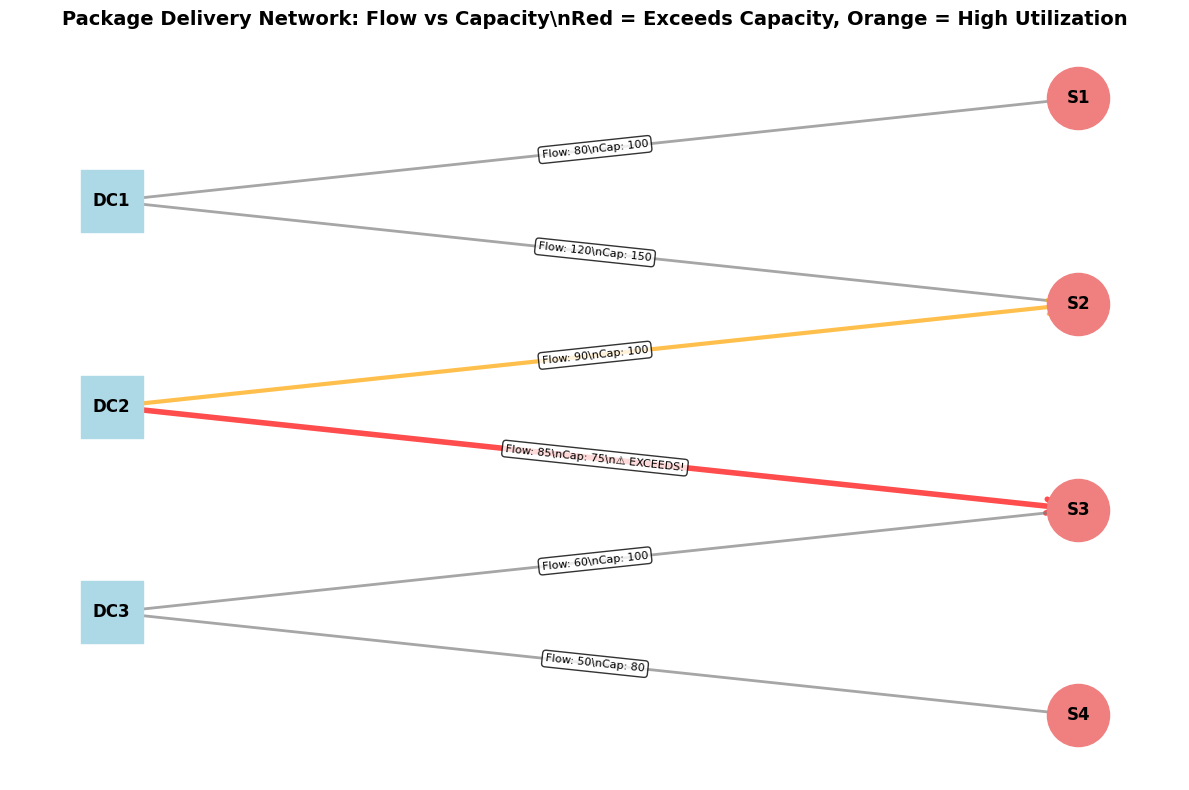

\nKey Observations:
  • DC2 → S3: Flow (85) exceeds Capacity (75) - BOTTLENECK!
  • DC1 → S2: High utilization (80%) - potential bottleneck
  • Other routes have excess capacity
  • Visual representation makes problems immediately obvious


In [4]:
# Create layout
pos = {
    'DC1': (0, 2), 'DC2': (0, 1), 'DC3': (0, 0),
    'S1': (3, 2.5), 'S2': (3, 1.5), 'S3': (3, 0.5), 'S4': (3, -0.5)
}

# Draw network
fig, ax = plt.subplots(figsize=(12, 8))

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=distribution_centers, 
                      node_color='lightblue', node_size=2000, node_shape='s')
nx.draw_networkx_nodes(G, pos, nodelist=stores, 
                      node_color='lightcoral', node_size=2000, node_shape='o')

# Draw edges with colors based on utilization
edge_colors = []
edge_widths = []
for from_node, to_node, capacity, flow in edges_data:
    utilization = flow / capacity if capacity > 0 else 0
    if flow > capacity:
        edge_colors.append('red')
        edge_widths.append(4)
    elif utilization > 0.8:
        edge_colors.append('orange')
        edge_widths.append(3)
    else:
        edge_colors.append('gray')
        edge_widths.append(2)

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths,
                       arrows=True, arrowsize=25, arrowstyle='->', alpha=0.7)

# Add flow and capacity labels
edge_labels = {}
for from_node, to_node, capacity, flow in edges_data:
    label = f"Flow: {flow}\\nCap: {capacity}"
    if flow > capacity:
        label += "\\n⚠️ EXCEEDS!"
    edge_labels[(from_node, to_node)] = label

nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8, bbox=dict(boxstyle='round', 
                                                                          facecolor='white', alpha=0.8))

# Node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

plt.title('Package Delivery Network: Flow vs Capacity\\nRed = Exceeds Capacity, Orange = High Utilization', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print("\\nKey Observations:")
print("  • DC2 → S3: Flow (85) exceeds Capacity (75) - BOTTLENECK!")
print("  • DC1 → S2: High utilization (80%) - potential bottleneck")
print("  • Other routes have excess capacity")
print("  • Visual representation makes problems immediately obvious")


FLOW RATE vs TOTAL FLOW
Flow Rate: 100 packages/hour
Capacity: 100 packages/hour
\nTotal Flow:
  Per day: 2,400 packages
  Per week: 16,800 packages
\n✓ CORRECT: Compare capacity (100 packages/hour) to flow rate (100 packages/hour)
✗ WRONG: Compare capacity to total flow (16,800 packages/week)


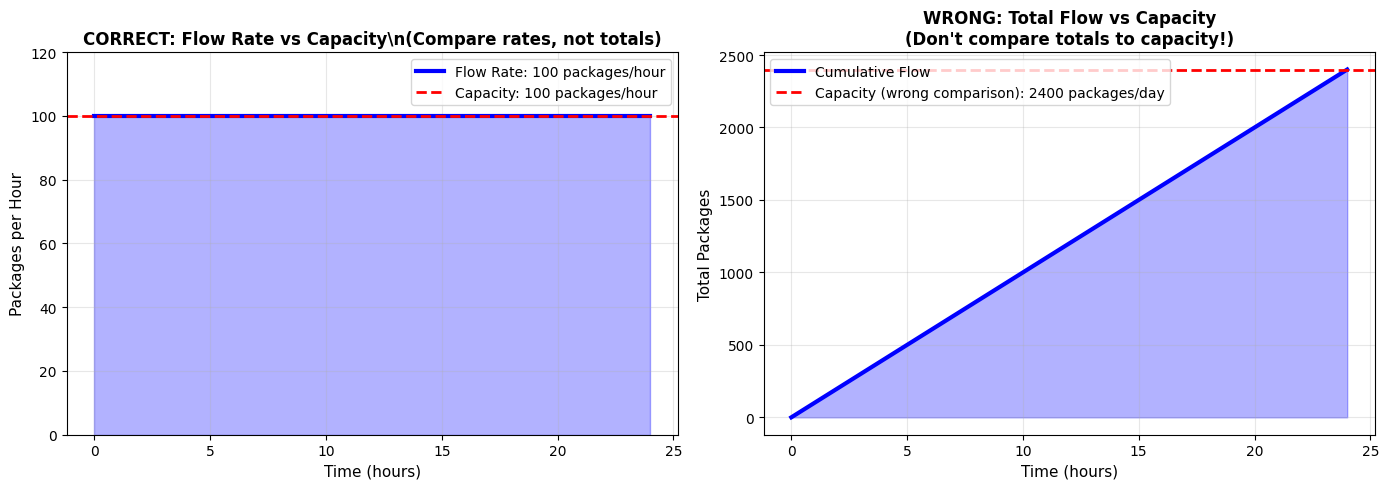

\nKey Insight:
  • Capacity is about flow RATE (units per time)
  • Total flow accumulates over time
  • You must compare capacity to flow rate, not to total flow
  • Confusing these leads to capacity planning mistakes


In [5]:
# Example: Understanding the difference
print("FLOW RATE vs TOTAL FLOW")
print("=" * 60)

# Scenario: A route handles packages
flow_rate_per_hour = 100  # packages per hour
hours_per_day = 24
days_per_week = 7

# Calculate total flow
total_flow_per_day = flow_rate_per_hour * hours_per_day
total_flow_per_week = flow_rate_per_hour * hours_per_day * days_per_week

# Capacity is about flow rate
capacity_per_hour = 100  # packages per hour

print(f"Flow Rate: {flow_rate_per_hour} packages/hour")
print(f"Capacity: {capacity_per_hour} packages/hour")
print(f"\\nTotal Flow:")
print(f"  Per day: {total_flow_per_day:,} packages")
print(f"  Per week: {total_flow_per_week:,} packages")

print(f"\\n✓ CORRECT: Compare capacity ({capacity_per_hour} packages/hour) to flow rate ({flow_rate_per_hour} packages/hour)")
print(f"✗ WRONG: Compare capacity to total flow ({total_flow_per_week:,} packages/week)")

# Visualize the difference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Flow Rate (correct comparison)
time_points = np.arange(0, 25, 1)  # 24 hours
flow_rate_line = np.full_like(time_points, flow_rate_per_hour)
capacity_line = np.full_like(time_points, capacity_per_hour)

ax1.plot(time_points, flow_rate_line, 'b-', linewidth=3, label=f'Flow Rate: {flow_rate_per_hour} packages/hour')
ax1.axhline(y=capacity_per_hour, color='r', linestyle='--', linewidth=2, label=f'Capacity: {capacity_per_hour} packages/hour')
ax1.fill_between(time_points, 0, flow_rate_line, alpha=0.3, color='blue')
ax1.set_xlabel('Time (hours)', fontsize=11)
ax1.set_ylabel('Packages per Hour', fontsize=11)
ax1.set_title('CORRECT: Flow Rate vs Capacity\\n(Compare rates, not totals)', fontweight='bold', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 120)

# Plot 2: Total Flow (incorrect comparison)
cumulative_flow = flow_rate_per_hour * time_points
capacity_total = capacity_per_hour * 24  # Total capacity per day

ax2.plot(time_points, cumulative_flow, 'b-', linewidth=3, label=f'Cumulative Flow')
ax2.axhline(y=capacity_total, color='r', linestyle='--', linewidth=2, 
           label=f'Capacity (wrong comparison): {capacity_total} packages/day')
ax2.fill_between(time_points, 0, cumulative_flow, alpha=0.3, color='blue')
ax2.set_xlabel('Time (hours)', fontsize=11)
ax2.set_ylabel('Total Packages', fontsize=11)
ax2.set_title('WRONG: Total Flow vs Capacity\n(Don\'t compare totals to capacity!)', fontweight='bold', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\\nKey Insight:")
print("  • Capacity is about flow RATE (units per time)")
print("  • Total flow accumulates over time")
print("  • You must compare capacity to flow rate, not to total flow")
print("  • Confusing these leads to capacity planning mistakes")


BOTTLENECK ANALYSIS
\n⚠️  BOTTLENECKS (Flow exceeds capacity):


,Route,Flow,Capacity,Excess,Utilization
0,DC2 → S3,85,75,10,113.333333


\n  These routes cannot handle current flow!
  Packages will be delayed or lost.
\n⚠️  HIGH UTILIZATION (Risk of bottleneck):


,Route,Flow,Capacity,Utilization
0,DC2 → S2,90,100,90.0


\n  These routes are close to capacity.
  Small increases in flow will cause problems.


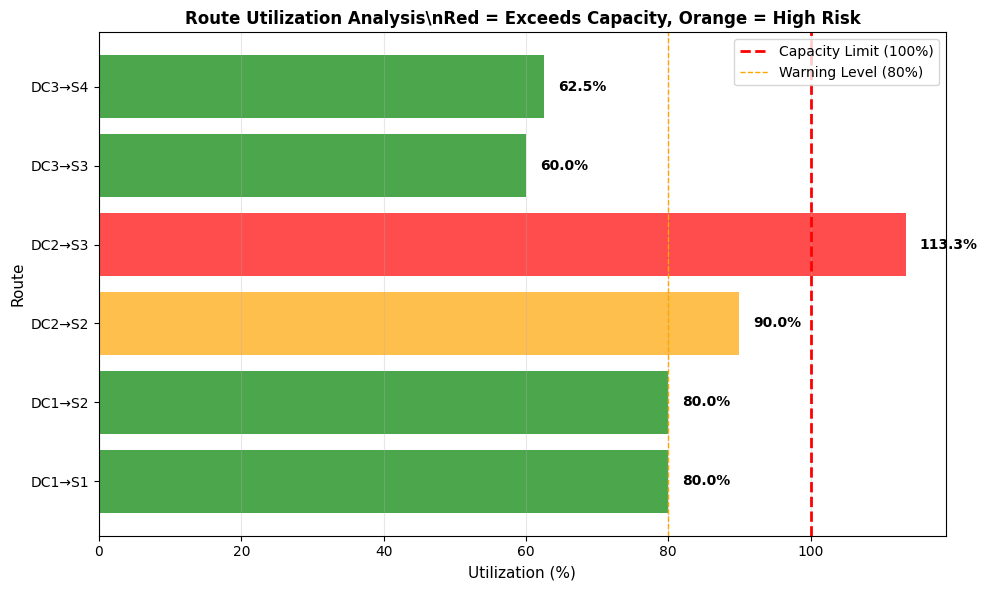

\nKey Insight:
  • Flow patterns reveal bottlenecks immediately
  • Routes with flow > capacity are bottlenecks
  • Routes with high utilization are at risk
  • Understanding flow helps prioritize capacity investments


In [6]:
# Analyze bottlenecks
print("BOTTLENECK ANALYSIS")
print("=" * 60)

bottlenecks = []
high_utilization = []

for from_node, to_node, capacity, flow in edges_data:
    utilization = (flow / capacity * 100) if capacity > 0 else 0
    
    if flow > capacity:
        bottlenecks.append({
            'Route': f"{from_node} → {to_node}",
            'Flow': flow,
            'Capacity': capacity,
            'Excess': flow - capacity,
            'Utilization': utilization
        })
    elif utilization > 80:
        high_utilization.append({
            'Route': f"{from_node} → {to_node}",
            'Flow': flow,
            'Capacity': capacity,
            'Utilization': utilization
        })

if bottlenecks:
    print("\\n⚠️  BOTTLENECKS (Flow exceeds capacity):")
    bottleneck_df = pd.DataFrame(bottlenecks)
    display(bottleneck_df)
    print(f"\\n  These routes cannot handle current flow!")
    print(f"  Packages will be delayed or lost.")
else:
    print("\\n✓ No bottlenecks found (all flows within capacity)")

if high_utilization:
    print("\\n⚠️  HIGH UTILIZATION (Risk of bottleneck):")
    high_util_df = pd.DataFrame(high_utilization)
    display(high_util_df)
    print(f"\\n  These routes are close to capacity.")
    print(f"  Small increases in flow will cause problems.")

# Visualize utilization
fig, ax = plt.subplots(figsize=(10, 6))

routes = [f"{f}→{t}" for f, t, _, _ in edges_data]
utilizations = [(f/c*100) if c > 0 else 0 for _, _, c, f in edges_data]
colors = ['red' if u > 100 else 'orange' if u > 80 else 'green' for u in utilizations]

bars = ax.barh(routes, utilizations, color=colors, alpha=0.7)
ax.axvline(x=100, color='red', linestyle='--', linewidth=2, label='Capacity Limit (100%)')
ax.axvline(x=80, color='orange', linestyle='--', linewidth=1, label='Warning Level (80%)')

ax.set_xlabel('Utilization (%)', fontsize=11)
ax.set_ylabel('Route', fontsize=11)
ax.set_title('Route Utilization Analysis\\nRed = Exceeds Capacity, Orange = High Risk', fontweight='bold', fontsize=12)
ax.legend()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, util) in enumerate(zip(bars, utilizations)):
    ax.text(util + 2, i, f'{util:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\\nKey Insight:")
print("  • Flow patterns reveal bottlenecks immediately")
print("  • Routes with flow > capacity are bottlenecks")
print("  • Routes with high utilization are at risk")
print("  • Understanding flow helps prioritize capacity investments")


## Step 7: Key Takeaways

**Flow is what makes networks useful**:
- Flow represents movement through networks
- Without flow, networks are just static structures

**Capacity limits flow**:
- You cannot flow more than capacity allows
- Flow exceeding capacity causes congestion, delays, or failures

**Flow rate vs total flow**:
- Capacity must be compared to flow rate (units per time), not total flow
- Confusing these leads to capacity planning mistakes

**Flow patterns reveal bottlenecks**:
- Where flow is concentrated and capacity is insufficient
- Understanding flow helps you identify problems and prioritize investments

**Next steps**: Once you understand flow and capacity, you can identify bottlenecks and understand how they limit overall network performance.
